In [1]:
using StatsPlots, DataFrames, DataFramesMeta, Dates, MPThemes, XLSX, LaTeXStrings

In [2]:
gr()

Plots.GRBackend()

In [3]:
raw_data = XLSX.readdata("The_Great_Weight-off.xlsx", "Sheet1", "E2:G344");


### **Prediction is given by equation:**

#### $m(d) = m_0\frac{1}{\sqrt[30]{1.01}^{d}}$



In [4]:
function predict(m₀,date; day1 = Dates.value(Dates.Date("2022-01-24")))
    day = Dates.value(date) - day1 
    return m₀*1.01^(-day/30)
end

predict (generic function with 1 method)

In [5]:
data = DataFrame(
    row   = [r for r in 1:length(raw_data[2:end,1])],
    Date = Date("2022-01-24") : Day(1) : Date("2022-12-31"),
    Lukas = raw_data[2:end, 1],
    Miro  = raw_data[2:end, 2],
    Maros = raw_data[2:end, 3],
    );
@transform! data :Lukas_pred = predict.(data.Lukas[1],data.Date)
@transform! data :Miro_pred  = predict.(data.Miro[1],data.Date)
@transform! data :Maros_pred = predict.(data.Maros[1],data.Date);

In [28]:
theme(:vibrant,
        size = (1000,600), 
        formatter = :auto, 
        dpi = 100,
        legend = :outertopright,
        legendfontsize = 12,
        grid = :on,
        xminorticks = :true,
        gridalpha = 0.05,
        xrotation = 60,
        bottom_margin = 12Plots.mm,
        left_margin = 8Plots.mm,
        right_margin = 8Plots.mm,
        framestyle = :frame,
        )
months = Date("2022-02") : Month(1) : Date("2023-01")
xticks = (Dates.value.(months), months );   #ticks every month given as tuple of (where, what)
yticks = ([70+x for x in 0:5:30], [70+x for x in 0:5:30]); #ticks every 5 kilgrams
cmap = [palette(:YlGnBu_9)[9] palette(:YlGnBu_9)[7] palette(:YlGnBu_9)[5]];

In [29]:
p1 = @df data plot(:Date, 
        [:Lukas :Miro :Maros], 
        c = cmap, 
        alpha = 0.6,
        marker = [:circle :utriangle :square],
        label  = ["Lukas" "Miro" "Maros"],
        title  = "The Great Weight-Off",
        ylabel = "Weight [kg]",
        xticks = xticks,
        minorticks = 5,
        yticks = yticks,
        markerstrokecolor = [:white :white :white],
        ms = 6,
        ylims = (70, 100),
        line = :scatter,
        );

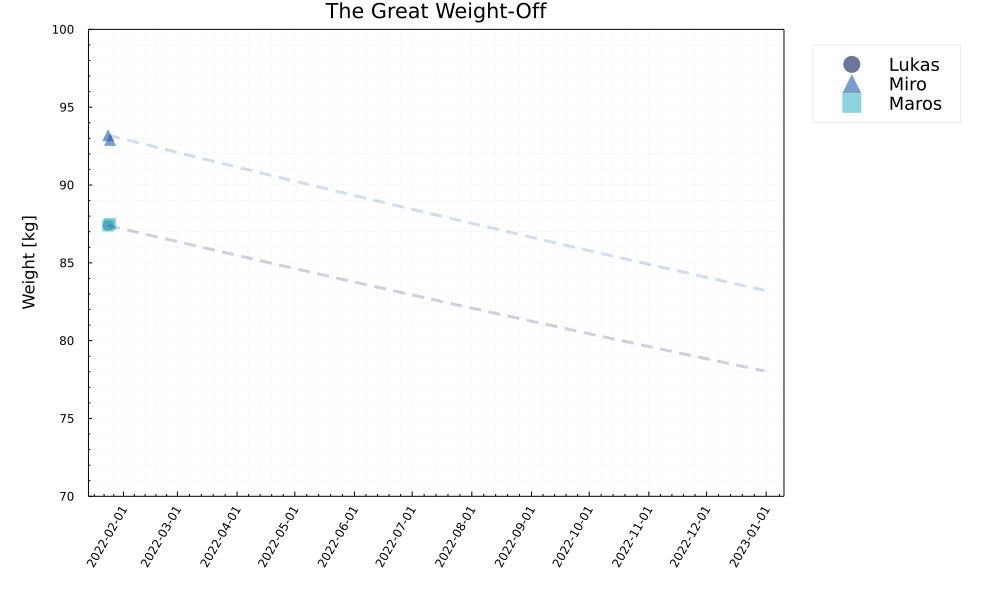

In [30]:
@df data plot!( data.Date,
    [:Lukas_pred :Miro_pred],
    c = cmap,
    alpha = 0.2,
    label = ["" ""],
    style = [:dash :dash],
    linewidth = 3
)

In [31]:
savefig(p1, "fig.png")

In [144]:
a = -0.5
b = 0.5

0.5

In [145]:
df_new = DataFrame(Date = data.Date)

@rtransform! df_new :Lukas = (a+(b-a) .* rand()) .+ predict.(data.Lukas[1], :Date)
@rtransform! df_new :Miro  = (a+(b-a) .* rand()) .+ predict.(data.Miro[1], :Date) 
@rtransform! df_new :Maros = (a+(b-a) .* rand()) .+ predict.(data.Maros[1], :Date) 

,Date,Lukas,Miro,Maros
,Date,Float64,Float64,Float64
1,2022-01-24,87.5747,93.1891,87.4051
2,2022-01-25,87.5649,92.98,87.1399
3,2022-01-26,87.288,93.2424,87.2328
4,2022-01-27,86.8171,93.1901,87.4431
5,2022-01-28,87.5782,93.462,87.5178
6,2022-01-29,86.8584,93.3768,87.6987
7,2022-01-30,86.7699,92.7349,87.1996
8,2022-01-31,87.6586,92.5402,87.2585
9,2022-02-01,87.1622,93.4283,86.9526


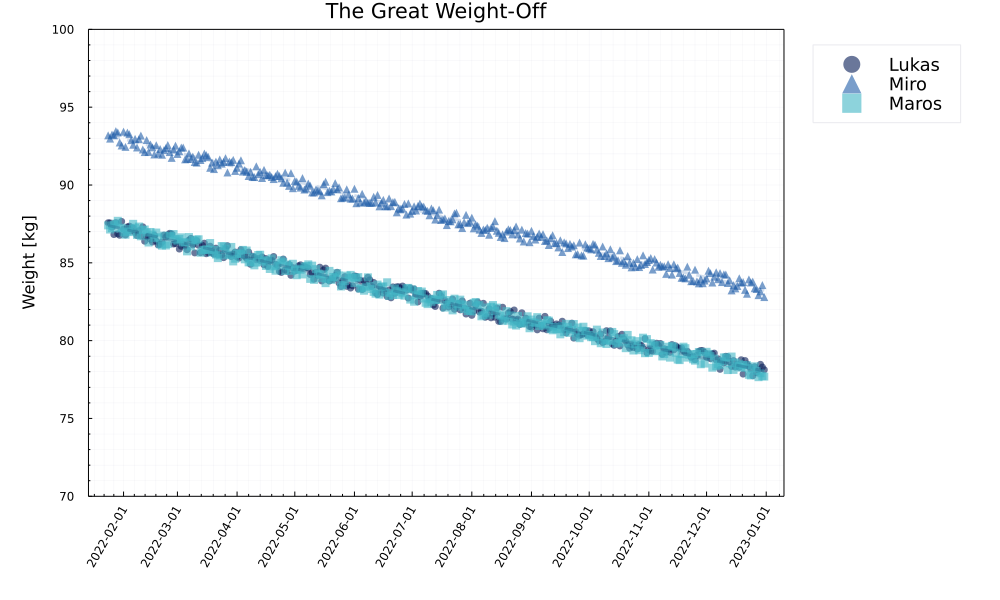

In [147]:
p2 = @df df_new scatter(:Date, [:Lukas :Miro :Maros],
        c = cmap, 
        alpha = 0.6,
        marker = [:circle :utriangle :square],
        label  = ["Lukas" "Miro" "Maros"],
        title  = "The Great Weight-Off",
        ylabel = "Weight [kg]",
        xticks = xticks,
        minorticks = 5,
        yticks = yticks,
        markerstrokecolor = [:white :white :white],
        ms = 4,
        ylims = (70, 100),
        line = :scatter,)

@df data plot!( data.Date,
    [:Lukas_pred :Miro_pred],
    c = cmap,
    alpha = 0.2,
    label = ["" ""],
    style = [:dash :dash],
    linewidth = 3
)

┌ Info: Saved animation to 
│   fn = /media/shoram/Extra SSD/CernBox/Work/GreatWeightOff/gif.gif
└ @ Plots /home/shoram/.julia/packages/Plots/Xv2qA/src/animation.jl:114


Plots.AnimatedGif("/media/shoram/Extra SSD/CernBox/Work/GreatWeightOff/gif.gif")
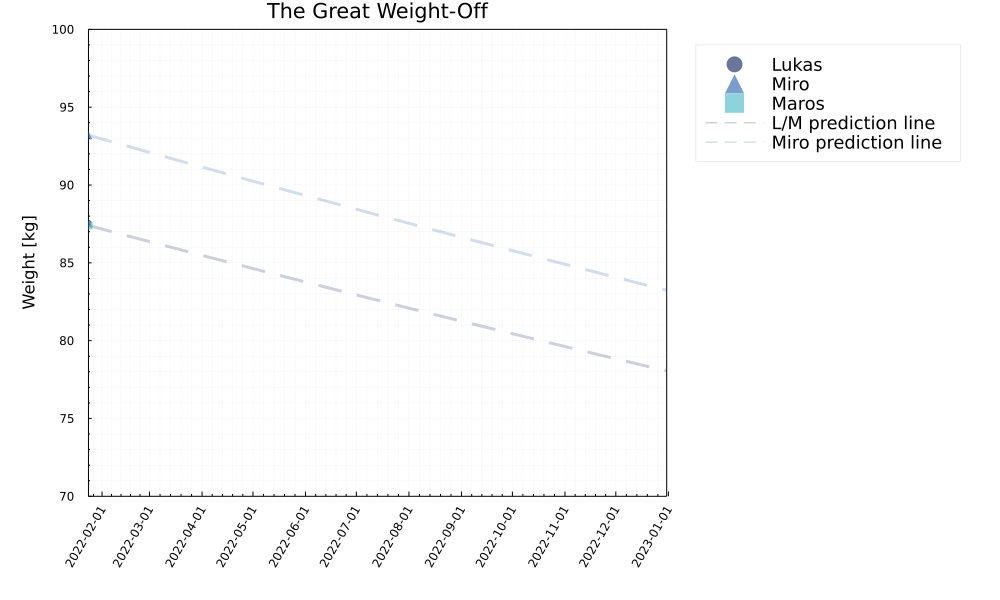

In [157]:
anim = @animate for i ∈ 1:2:length(df_new.Date)
    p2 = @df df_new scatter(:Date[1:i], [:Lukas[1:i] :Miro[1:i] :Maros[1:i]],
        c = cmap, 
        alpha = 0.6,
        marker = [:circle :utriangle :square],
        label  = ["Lukas" "Miro" "Maros"],
        title  = "The Great Weight-Off",
        ylabel = "Weight [kg]",
        xticks = xticks,
        xlims  = (:Date[1], :Date[end]),
        minorticks = 5,
        yticks = yticks,
        markerstrokecolor = [:white :white :white],
        ms = 4,
        ylims = (70, 100),
        line = :scatter,)
    
    @df data plot!( data.Date,
    [:Lukas_pred :Miro_pred],
    c = cmap,
    alpha = 0.2,
    label = ["L/M prediction line" "Miro prediction line"],
    style = [:dash :dash],
    linewidth = 3
    )
    
end
gif(anim, "gif.gif", fps = 15)

Date("2022-02-01"):Month(1):Date("2023-01-01")